In [1]:
library("ggplot2")

In [2]:
c_results = read.csv("Matrix_multiplication_C_O0.csv")
c_results = c_results[c("function_type", "matrix_size", "real_time")]
c_results

function_type,matrix_size,real_time
bla_c,100,0.002
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001
bla_c,100,0.001


In [3]:
avg_c_results = aggregate( real_time ~ function_type:matrix_size, data=c_results, FUN=mean)
avg_c_results$std_dev = aggregate( real_time ~ function_type:matrix_size, data=c_results, FUN=sd)$real_time
avg_c_results

function_type,matrix_size,real_time,std_dev
bet_c,100,0.0036,0.0005163978
bla_c,100,0.0011,0.0003162278
nai_c,100,0.0040,0.0000000000
bet_c,200,0.0271,0.0005676462
bla_c,200,0.0044,0.0005163978
nai_c,200,0.0324,0.0006992059
bet_c,300,0.0900,0.0004714045
bla_c,300,0.0148,0.0004216370
nai_c,300,0.1129,0.0003162278
bet_c,400,0.2110,0.0000000000


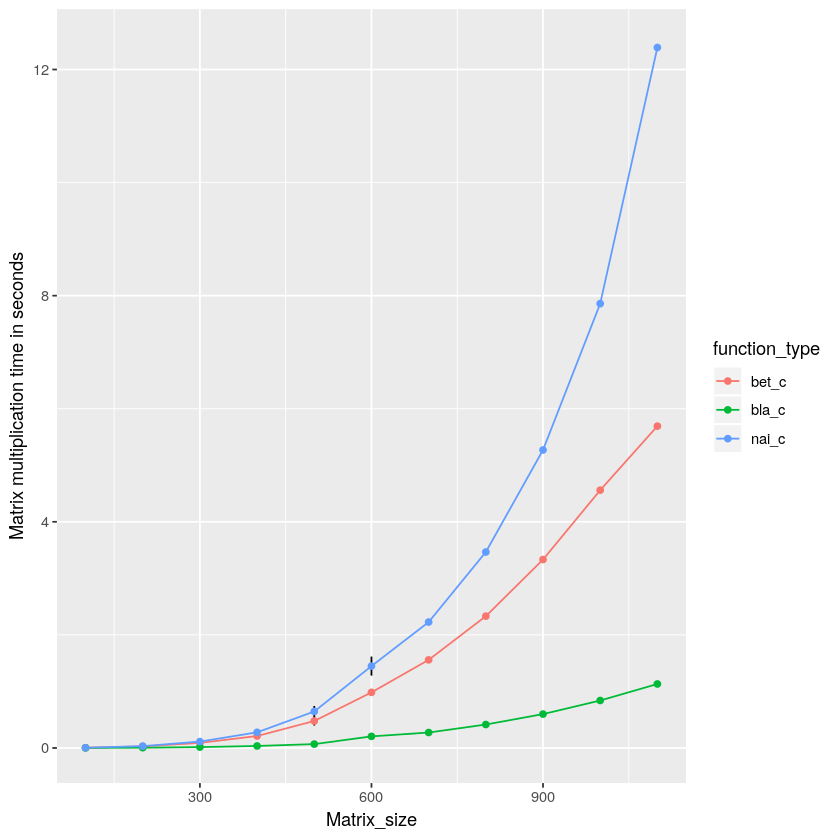

In [4]:
ggplot(avg_c_results, aes(matrix_size,real_time,color=function_type)) + 
geom_errorbar(aes(ymin=real_time-std_dev, ymax=real_time+std_dev), width=.1, color="black") +
geom_line() + 
geom_point() + 
ylab("Matrix multiplication time in seconds") +
xlab("Matrix_size")

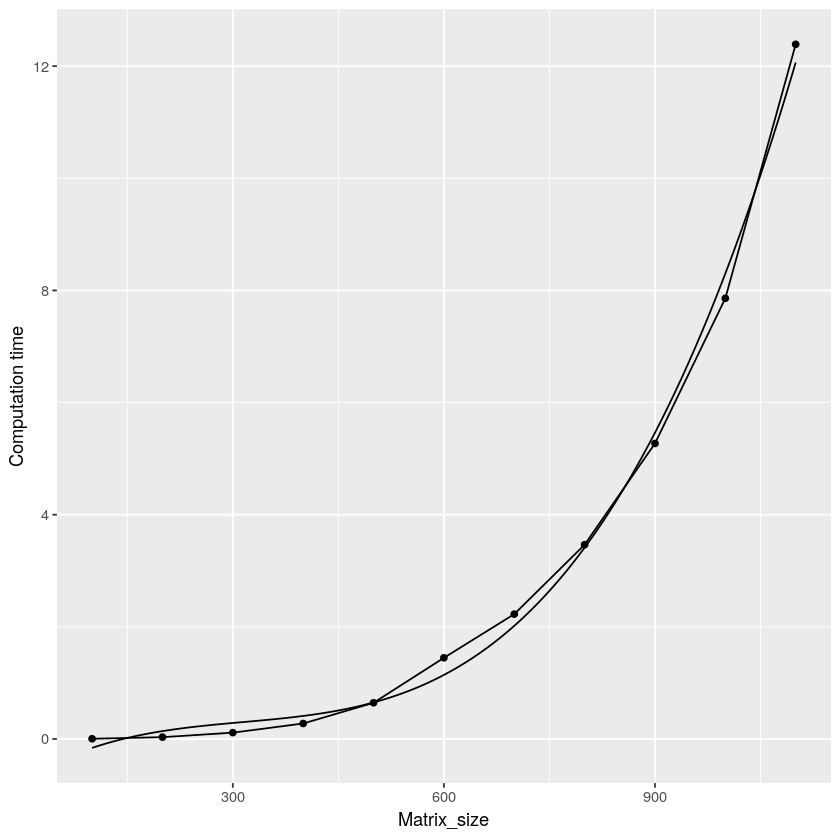

In [5]:
nai_avg_c_results = avg_c_results[avg_c_results$function_type=="nai_c",]
nai_x = nai_avg_c_results$matrix_size
nai_y = nai_avg_c_results$real_time
nai_data = data.frame(x=nai_x, y=nai_y)
nai_fit = lm(y ~ poly(x, 3, raw=TRUE), data=nai_data)
nai_fit_data = data.frame(x = seq(100, 1100, length.out=250))
nai_fit_data$y = predict(nai_fit, nai_fit_data)
ggplot(nai_data, aes(nai_x, nai_y)) + geom_point() + geom_line() +
geom_line(data=nai_fit_data, aes(x,y)) +
xlab("Matrix_size") + 
ylab("Computation time")

In [6]:
nai_fit


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = nai_data)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
             -7.476e-01                7.779e-03               -2.119e-05  
poly(x, 3, raw = TRUE)3  
              2.246e-08  


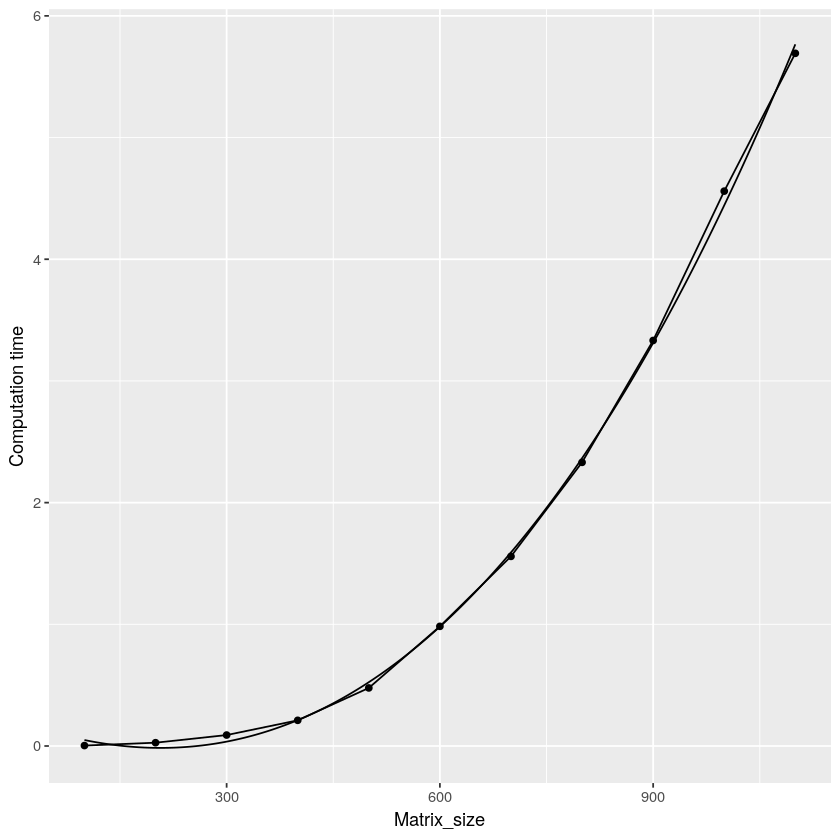

In [7]:
bet_avg_c_results = avg_c_results[avg_c_results$function_type=="bet_c",]
bet_x = bet_avg_c_results$matrix_size
bet_y = bet_avg_c_results$real_time
bet_data = data.frame(x=bet_x, y=bet_y)
bet_fit = lm(y ~ poly(x, 3, raw=TRUE), data=bet_data)
bet_fit_data = data.frame(x = seq(100, 1100, length.out=250))
bet_fit_data$y = predict(bet_fit, bet_fit_data)
ggplot(bet_data, aes(bet_x, bet_y)) + geom_point() + geom_line() +
geom_line(data=bet_fit_data, aes(x,y)) +
xlab("Matrix_size") + 
ylab("Computation time")

In [8]:
bet_fit


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = bet_data)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
              2.196e-01               -2.205e-03                4.828e-06  
poly(x, 3, raw = TRUE)3  
              1.600e-09  


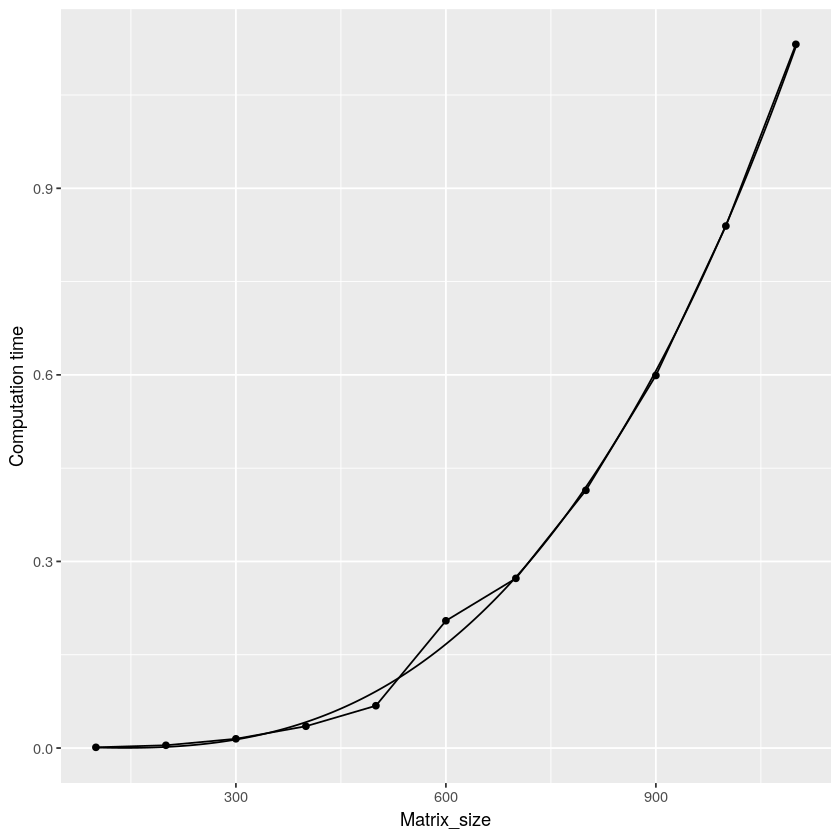

In [9]:
bla_avg_c_results = avg_c_results[avg_c_results$function_type=="bla_c",]
bla_x = bla_avg_c_results$matrix_size
bla_y = bla_avg_c_results$real_time
bla_data = data.frame(x=bla_x, y=bla_y)
bla_fit = lm(y ~ poly(x, 3, raw=TRUE), data=bla_data)
bla_fit_data = data.frame(x = seq(100, 1100, length.out=250))
bla_fit_data$y = predict(bla_fit, bla_fit_data)
ggplot(bla_data, aes(bla_x, bla_y)) + geom_point() + geom_line() +
geom_line(data=bla_fit_data, aes(x,y)) +
xlab("Matrix_size") + 
ylab("Computation time")

In [10]:
bla_fit


Call:
lm(formula = y ~ poly(x, 3, raw = TRUE), data = bla_data)

Coefficients:
            (Intercept)  poly(x, 3, raw = TRUE)1  poly(x, 3, raw = TRUE)2  
              5.689e-03               -6.045e-05                2.927e-08  
poly(x, 3, raw = TRUE)3  
              8.662e-10  


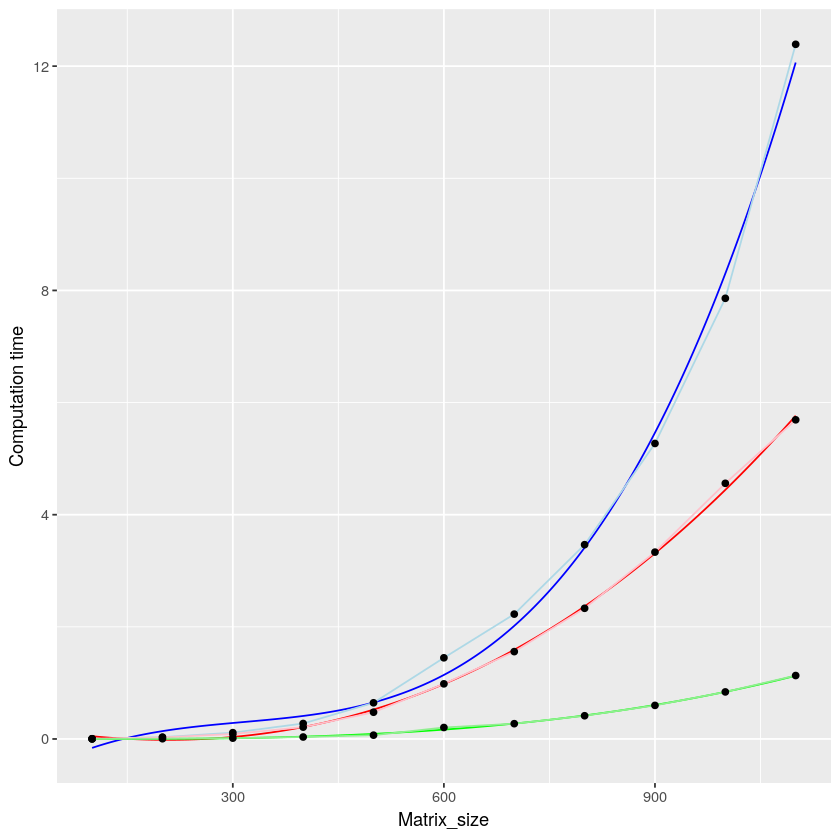

In [11]:
ggplot() +
geom_line(data=nai_fit_data, aes(x,y), color="blue") +
geom_line(data=nai_data, aes(nai_data$x, nai_data$y), color="lightblue") + geom_point(data=nai_data, aes(nai_data$x, nai_data$y)) +
geom_line(data=bet_fit_data, aes(x,y), color="red") +
geom_line(data=bet_data, aes(bet_data$x, bet_data$y), color="pink") + geom_point(data=bet_data, aes(bet_data$x, bet_data$y)) +
geom_line(data=bla_fit_data, aes(x,y), color="green") +
geom_line(data=bla_data, aes(bla_data$x, bla_data$y), color="lightgreen") + geom_point(data=bla_data, aes(bla_data$x, bla_data$y)) +
xlab("Matrix_size") + 
ylab("Computation time")